In [1]:
!pip install pandas numpy scikit-learn

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas
import numpy as np


In [5]:
songs_df = pandas.read_csv('songs.csv')

In [6]:
to_drop = ['artist','album','track_number','id','name','uri']
randomforest_df = songs_df.drop(to_drop, axis=1)

randomforest_df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.78200,0.488,0.465,0.000001,0.1150,-7.721,0.0262,75.160,0.672,33
1,0.13400,0.479,0.817,0.000000,0.1410,-3.221,0.0895,154.895,0.520,36
2,0.55000,0.507,0.542,0.000000,0.4730,-5.868,0.0324,150.042,0.307,41
3,0.20300,0.510,0.791,0.000012,0.1220,-4.307,0.0472,144.896,0.070,35
4,0.06790,0.440,0.743,0.000012,0.1860,-5.219,0.0368,147.966,0.439,40
...,...,...,...,...,...,...,...,...,...,...
424,0.13500,0.367,0.749,0.000000,0.1020,-4.279,0.1870,179.791,0.286,42
425,0.02510,0.558,0.777,0.000199,0.2460,-5.640,0.3700,170.110,0.352,38
426,0.09060,0.452,0.622,0.000009,0.1440,-4.886,0.0429,87.995,0.213,45
427,0.01360,0.810,0.694,0.099800,0.1690,-3.847,0.0869,140.033,0.277,20


In [11]:
predictors = randomforest_df.drop(columns='popularity').columns
outcome = 'popularity'

X = randomforest_df[predictors]
y = randomforest_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


# Train a random forest Regressor using the training set
rfModel = RandomForestRegressor(max_depth = 15, min_impurity_decrease = 0.01, min_samples_split=50, random_state=1)
rfModel.fit(train_X, train_y)

# Make predictions on the validation set
valid_predictions = rfModel.predict(valid_X)

# Making predictions on the same data or new data
predictions = rfModel.predict(valid_X)


# Calculate performance metrics
mae = mean_absolute_error(valid_y, predictions)
mse = mean_squared_error(valid_y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(valid_y, predictions)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R²: {r2:.2f}')



Mean Absolute Error: 9.75
Mean Squared Error: 142.75
Root Mean Squared Error: 11.95
R²: 0.11


In [14]:
import numpy as np
import pandas as pd

# Get feature importances
feature_importances = rfModel.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': train_X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


            Feature  Importance
5          loudness    0.337883
0      acousticness    0.284660
8           valence    0.098985
2            energy    0.087788
3  instrumentalness    0.057736
6       speechiness    0.038409
4          liveness    0.034858
1      danceability    0.033822
7             tempo    0.025858


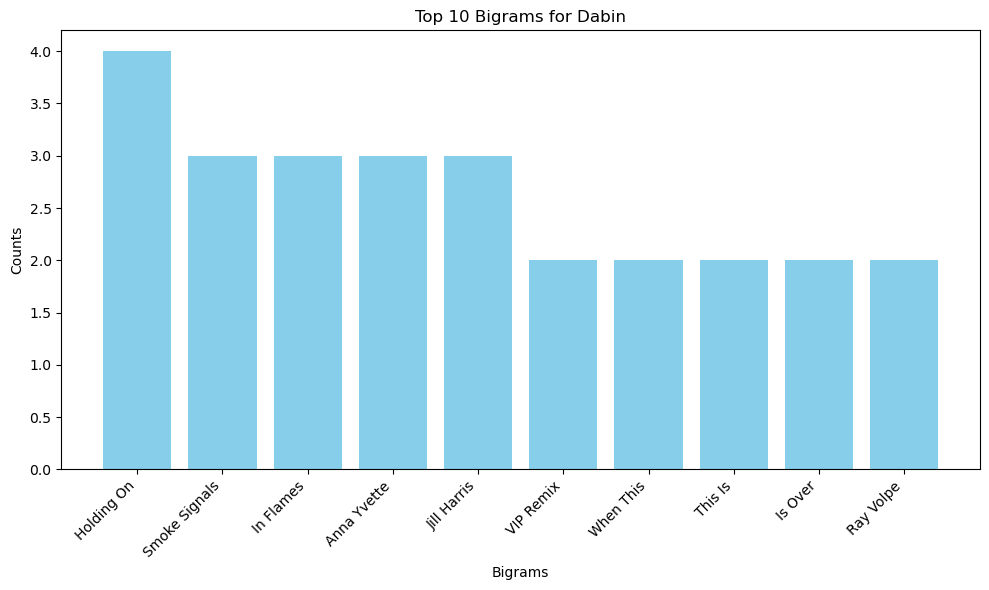

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


df = pd.read_csv('Dabin.csv')

song_titles = []

for title in df['name']:
    song_titles.append(title)

# using list comprehension + enumerate() + split()
# for Bigram formation
res = [(x, i.split()[j + 1]) for i in song_titles 
	for j, x in enumerate(i.split()) if j < len(i.split()) - 1]

remove = ['-', '&', 'feat.', '(feat.'] # Specifies removals

filtered_list = [item for item in res if not any(unwanted in item for unwanted in remove )]

filtered_list

# Initialize an empty dictionary to count instances
count_dict = {}

# Iterate over the list and count instances
for item in filtered_list:
    if item in count_dict:
        count_dict[item] += 1  # Increment the count
    else:
        count_dict[item] = 1  # Initialize the count
        
count_dict

# Sort the dictionary by value in descending order
sorted_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

# Extract keys as lists and values from the sorted dictionary
sorted_keys = [list(key) for key in sorted_dict.keys()]  # Convert tuple keys to lists
sorted_values = list(sorted_dict.values())

# Visualize only the first 10 entries
top_n = 10  # Number of top entries to visualize
sorted_keys = sorted_keys[:top_n]  # Get the top N keys
sorted_values = sorted_values[:top_n]  # Get the top N values

# Create the bar chart
plt.figure(figsize=(10, 6))  # Optional: make the plot larger
plt.bar([' '.join(key) for key in sorted_keys], sorted_values, color='skyblue')  # Join list elements for display
plt.xlabel('Bigrams')
plt.ylabel('Counts')
plt.title('Top 10 Bigrams for Dabin')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

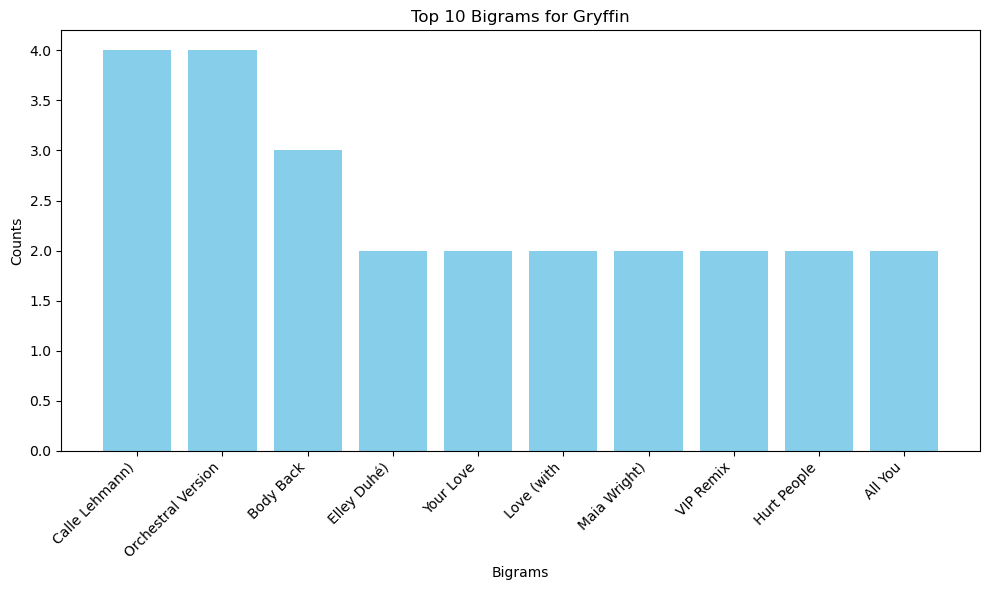

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


df = pd.read_csv('gryffin.csv')

song_titles = []

for title in df['name']:
    song_titles.append(title)

# using list comprehension + enumerate() + split()
# for Bigram formation
res = [(x, i.split()[j + 1]) for i in song_titles 
	for j, x in enumerate(i.split()) if j < len(i.split()) - 1]

remove = ['-', '&', 'feat.', '(feat.'] # Specifies removals

filtered_list = [item for item in res if not any(unwanted in item for unwanted in remove )]

filtered_list

# Initialize an empty dictionary to count instances
count_dict = {}

# Iterate over the list and count instances
for item in filtered_list:
    if item in count_dict:
        count_dict[item] += 1  # Increment the count
    else:
        count_dict[item] = 1  # Initialize the count
        
count_dict

# Sort the dictionary by value in descending order
sorted_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

# Extract keys as lists and values from the sorted dictionary
sorted_keys = [list(key) for key in sorted_dict.keys()]  # Convert tuple keys to lists
sorted_values = list(sorted_dict.values())

# Visualize only the first 10 entries
top_n = 10  # Number of top entries to visualize
sorted_keys = sorted_keys[:top_n]  # Get the top N keys
sorted_values = sorted_values[:top_n]  # Get the top N values

# Create the bar chart
plt.figure(figsize=(10, 6))  # Optional: make the plot larger
plt.bar([' '.join(key) for key in sorted_keys], sorted_values, color='skyblue')  # Join list elements for display
plt.xlabel('Bigrams')
plt.ylabel('Counts')
plt.title('Top 10 Bigrams for Gryffin')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

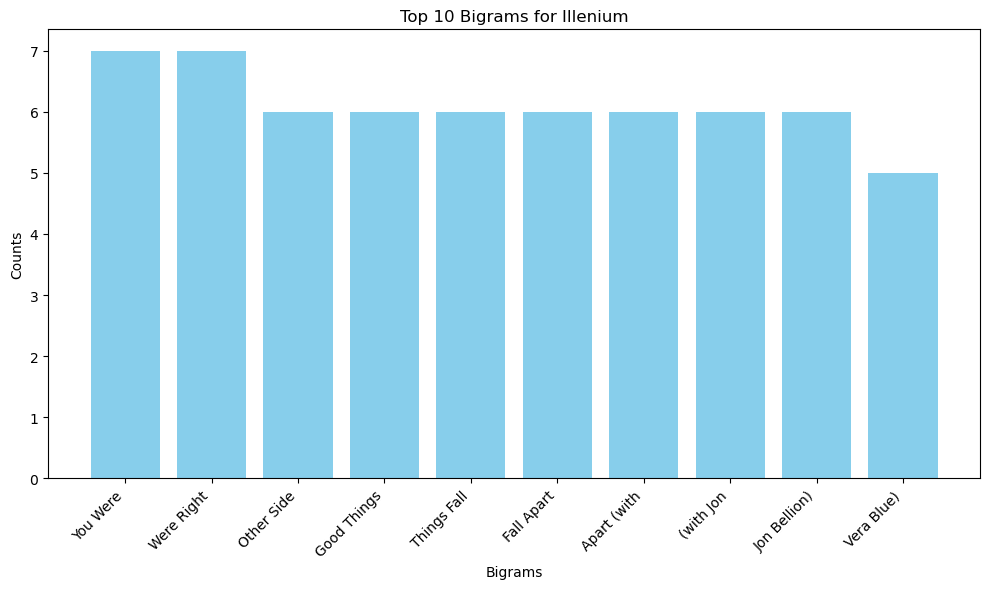

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


df = pd.read_csv('Illenium.csv')

song_titles = []

for title in df['name']:
    song_titles.append(title)

# using list comprehension + enumerate() + split()
# for Bigram formation
res = [(x, i.split()[j + 1]) for i in song_titles 
	for j, x in enumerate(i.split()) if j < len(i.split()) - 1]

remove = ['-', '&', 'feat.', '(feat.'] # Specifies removals

filtered_list = [item for item in res if not any(unwanted in item for unwanted in remove )]

filtered_list

# Initialize an empty dictionary to count instances
count_dict = {}

# Iterate over the list and count instances
for item in filtered_list:
    if item in count_dict:
        count_dict[item] += 1  # Increment the count
    else:
        count_dict[item] = 1  # Initialize the count
        
count_dict

# Sort the dictionary by value in descending order
sorted_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

# Extract keys as lists and values from the sorted dictionary
sorted_keys = [list(key) for key in sorted_dict.keys()]  # Convert tuple keys to lists
sorted_values = list(sorted_dict.values())

# Visualize only the first 10 entries
top_n = 10  # Number of top entries to visualize
sorted_keys = sorted_keys[:top_n]  # Get the top N keys
sorted_values = sorted_values[:top_n]  # Get the top N values

# Create the bar chart
plt.figure(figsize=(10, 6))  # Optional: make the plot larger
plt.bar([' '.join(key) for key in sorted_keys], sorted_values, color='skyblue')  # Join list elements for display
plt.xlabel('Bigrams')
plt.ylabel('Counts')
plt.title('Top 10 Bigrams for Illenium')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

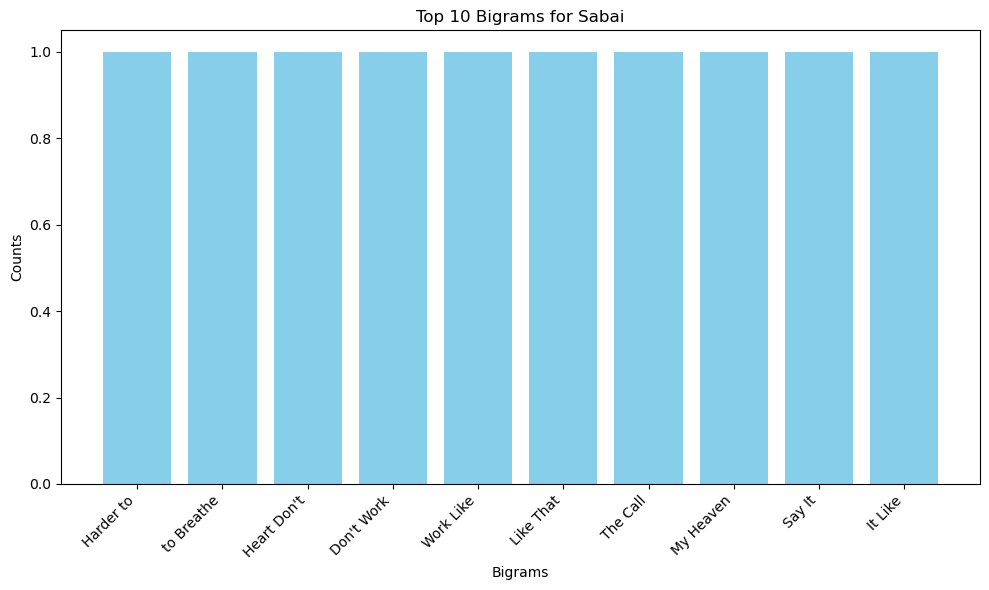

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


df = pd.read_csv('Sabai.csv')

song_titles = []

for title in df['name']:
    song_titles.append(title)

# using list comprehension + enumerate() + split()
# for Bigram formation
res = [(x, i.split()[j + 1]) for i in song_titles 
	for j, x in enumerate(i.split()) if j < len(i.split()) - 1]

remove = ['-', '&', 'feat.', '(feat.'] # Specifies removals

filtered_list = [item for item in res if not any(unwanted in item for unwanted in remove )]

filtered_list

# Initialize an empty dictionary to count instances
count_dict = {}

# Iterate over the list and count instances
for item in filtered_list:
    if item in count_dict:
        count_dict[item] += 1  # Increment the count
    else:
        count_dict[item] = 1  # Initialize the count
        
count_dict

# Sort the dictionary by value in descending order
sorted_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

# Extract keys as lists and values from the sorted dictionary
sorted_keys = [list(key) for key in sorted_dict.keys()]  # Convert tuple keys to lists
sorted_values = list(sorted_dict.values())

# Visualize only the first 10 entries
top_n = 10  # Number of top entries to visualize
sorted_keys = sorted_keys[:top_n]  # Get the top N keys
sorted_values = sorted_values[:top_n]  # Get the top N values

# Create the bar chart
plt.figure(figsize=(10, 6))  # Optional: make the plot larger
plt.bar([' '.join(key) for key in sorted_keys], sorted_values, color='skyblue')  # Join list elements for display
plt.xlabel('Bigrams')
plt.ylabel('Counts')
plt.title('Top 10 Bigrams for Sabai')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

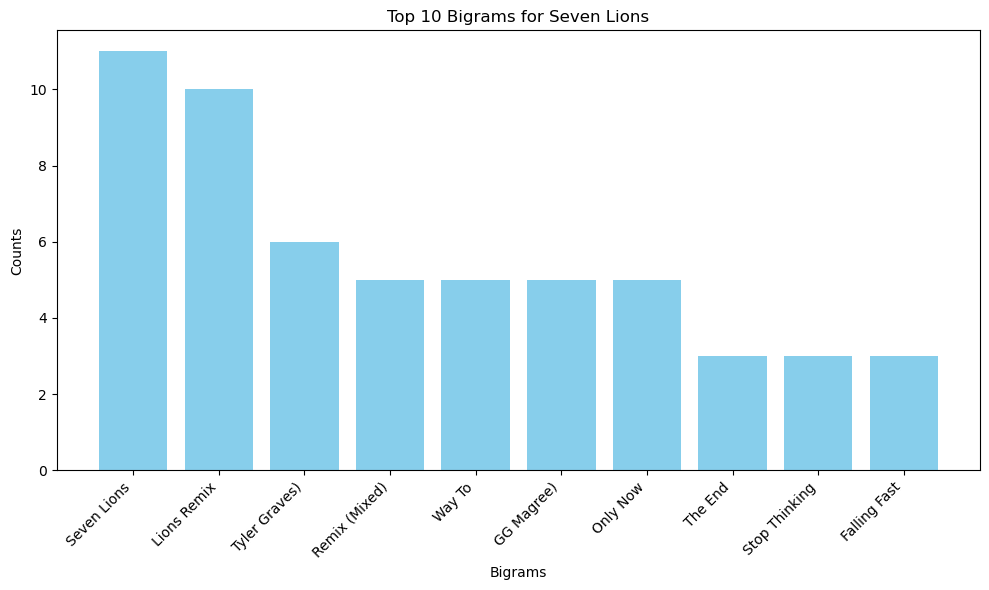

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


df = pd.read_csv('Lions.csv')

song_titles = []

for title in df['name']:
    song_titles.append(title)

# using list comprehension + enumerate() + split()
# for Bigram formation
res = [(x, i.split()[j + 1]) for i in song_titles 
	for j, x in enumerate(i.split()) if j < len(i.split()) - 1]

remove = ['-', '&', 'feat.', '(feat.'] # Specifies removals

filtered_list = [item for item in res if not any(unwanted in item for unwanted in remove )]

filtered_list

# Initialize an empty dictionary to count instances
count_dict = {}

# Iterate over the list and count instances
for item in filtered_list:
    if item in count_dict:
        count_dict[item] += 1  # Increment the count
    else:
        count_dict[item] = 1  # Initialize the count
        
count_dict

# Sort the dictionary by value in descending order
sorted_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

# Extract keys as lists and values from the sorted dictionary
sorted_keys = [list(key) for key in sorted_dict.keys()]  # Convert tuple keys to lists
sorted_values = list(sorted_dict.values())

# Visualize only the first 10 entries
top_n = 10  # Number of top entries to visualize
sorted_keys = sorted_keys[:top_n]  # Get the top N keys
sorted_values = sorted_values[:top_n]  # Get the top N values

# Create the bar chart
plt.figure(figsize=(10, 6))  # Optional: make the plot larger
plt.bar([' '.join(key) for key in sorted_keys], sorted_values, color='skyblue')  # Join list elements for display
plt.xlabel('Bigrams')
plt.ylabel('Counts')
plt.title('Top 10 Bigrams for Seven Lions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Trigram

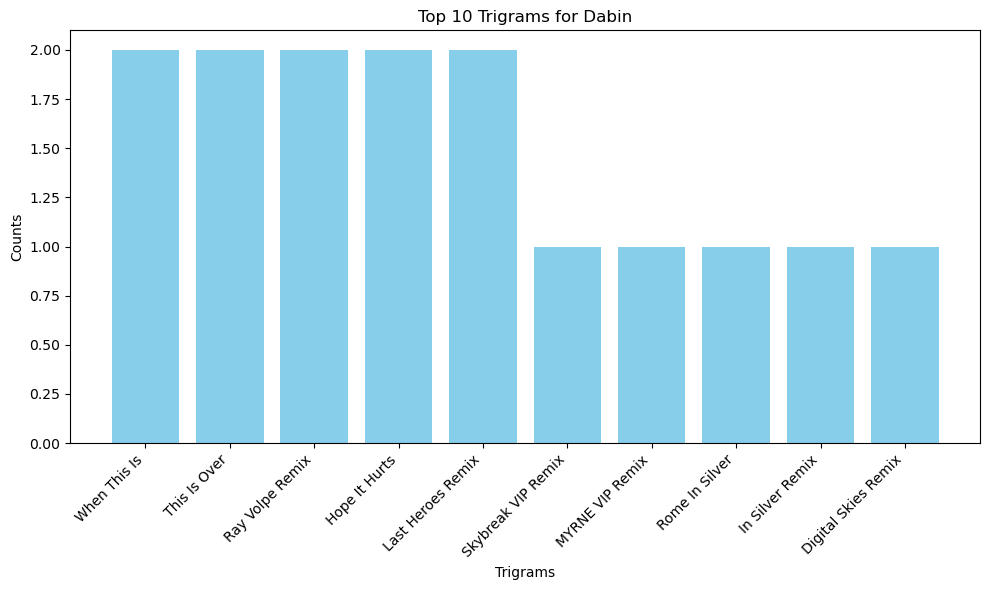

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


df = pd.read_csv('Dabin.csv')

song_titles = []

for title in df['name']:
    song_titles.append(title)

# using list comprehension + enumerate() + split()
# for Trigram formation
res = [(x, i.split()[j + 1], i.split()[j + 2]) for i in song_titles 
       for j, x in enumerate(i.split()) if j < len(i.split()) - 2]

remove = ['-', '&', 'feat.', '(feat.'] # Specifies removals

filtered_list = [item for item in res if not any(unwanted in item for unwanted in remove )]

filtered_list


# Initialize an empty dictionary to count instances
count_dict = {}

# Iterate over the list and count instances
for item in filtered_list:
    if item in count_dict:
        count_dict[item] += 1  # Increment the count
    else:
        count_dict[item] = 1  # Initialize the count
        
count_dict

# Sort the dictionary by value in descending order
sorted_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

# Extract keys as lists and values from the sorted dictionary
sorted_keys = [list(key) for key in sorted_dict.keys()]  # Convert tuple keys to lists
sorted_values = list(sorted_dict.values())

# Visualize only the first 10 entries
top_n = 10  # Number of top entries to visualize
sorted_keys = sorted_keys[:top_n]  # Get the top N keys
sorted_values = sorted_values[:top_n]  # Get the top N values

# Create the bar chart
plt.figure(figsize=(10, 6))  # Optional: make the plot larger
plt.bar([' '.join(key) for key in sorted_keys], sorted_values, color='skyblue')  # Join list elements for display
plt.xlabel('Trigrams')
plt.ylabel('Counts')
plt.title('Top 10 Trigrams for Dabin')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


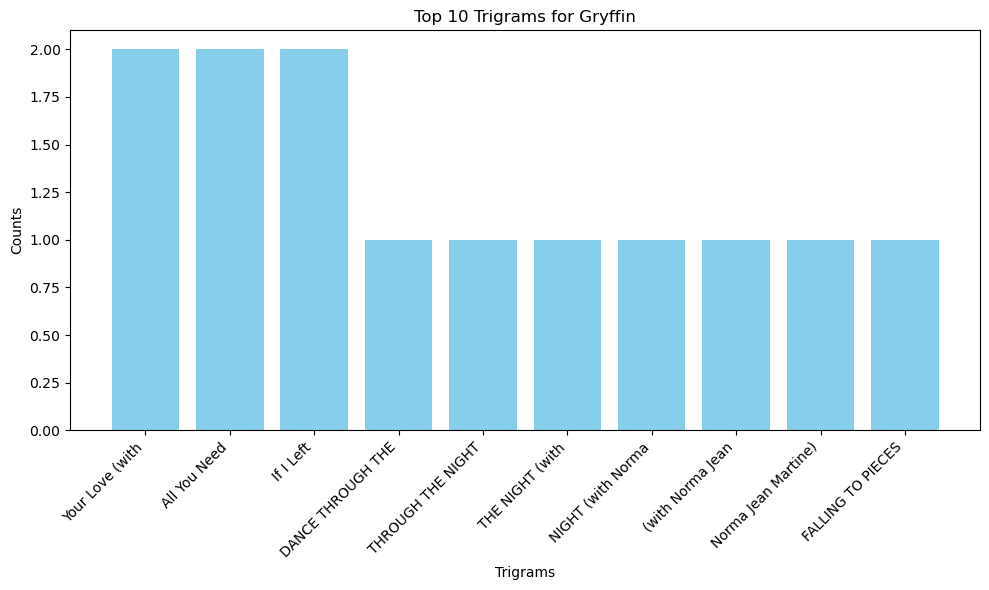

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


df = pd.read_csv('gryffin.csv')

song_titles = []

for title in df['name']:
    song_titles.append(title)

# using list comprehension + enumerate() + split()
# for Trigram formation
res = [(x, i.split()[j + 1], i.split()[j + 2]) for i in song_titles 
       for j, x in enumerate(i.split()) if j < len(i.split()) - 2]

remove = ['-', '&', 'feat.', '(feat.'] # Specifies removals

filtered_list = [item for item in res if not any(unwanted in item for unwanted in remove )]

filtered_list


# Initialize an empty dictionary to count instances
count_dict = {}

# Iterate over the list and count instances
for item in filtered_list:
    if item in count_dict:
        count_dict[item] += 1  # Increment the count
    else:
        count_dict[item] = 1  # Initialize the count
        
count_dict

# Sort the dictionary by value in descending order
sorted_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

# Extract keys as lists and values from the sorted dictionary
sorted_keys = [list(key) for key in sorted_dict.keys()]  # Convert tuple keys to lists
sorted_values = list(sorted_dict.values())

# Visualize only the first 10 entries
top_n = 10  # Number of top entries to visualize
sorted_keys = sorted_keys[:top_n]  # Get the top N keys
sorted_values = sorted_values[:top_n]  # Get the top N values

# Create the bar chart
plt.figure(figsize=(10, 6))  # Optional: make the plot larger
plt.bar([' '.join(key) for key in sorted_keys], sorted_values, color='skyblue')  # Join list elements for display
plt.xlabel('Trigrams')
plt.ylabel('Counts')
plt.title('Top 10 Trigrams for Gryffin')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


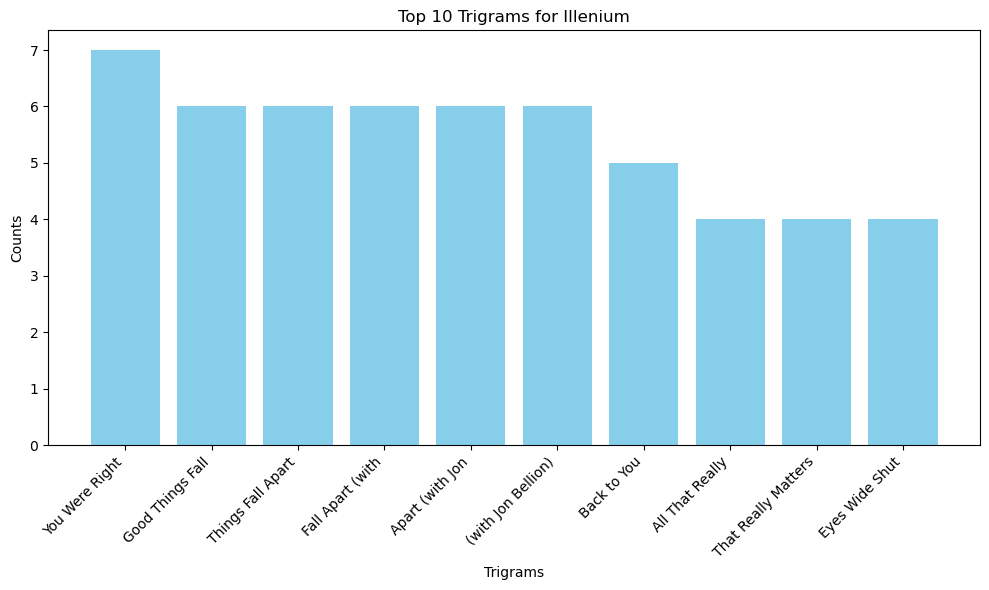

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


df = pd.read_csv('Illenium.csv')

song_titles = []

for title in df['name']:
    song_titles.append(title)

# using list comprehension + enumerate() + split()
# for Trigram formation
res = [(x, i.split()[j + 1], i.split()[j + 2]) for i in song_titles 
       for j, x in enumerate(i.split()) if j < len(i.split()) - 2]

remove = ['-', '&', 'feat.', '(feat.'] # Specifies removals

filtered_list = [item for item in res if not any(unwanted in item for unwanted in remove )]

filtered_list


# Initialize an empty dictionary to count instances
count_dict = {}

# Iterate over the list and count instances
for item in filtered_list:
    if item in count_dict:
        count_dict[item] += 1  # Increment the count
    else:
        count_dict[item] = 1  # Initialize the count
        
count_dict

# Sort the dictionary by value in descending order
sorted_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

# Extract keys as lists and values from the sorted dictionary
sorted_keys = [list(key) for key in sorted_dict.keys()]  # Convert tuple keys to lists
sorted_values = list(sorted_dict.values())

# Visualize only the first 10 entries
top_n = 10  # Number of top entries to visualize
sorted_keys = sorted_keys[:top_n]  # Get the top N keys
sorted_values = sorted_values[:top_n]  # Get the top N values

# Create the bar chart
plt.figure(figsize=(10, 6))  # Optional: make the plot larger
plt.bar([' '.join(key) for key in sorted_keys], sorted_values, color='skyblue')  # Join list elements for display
plt.xlabel('Trigrams')
plt.ylabel('Counts')
plt.title('Top 10 Trigrams for Illenium')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


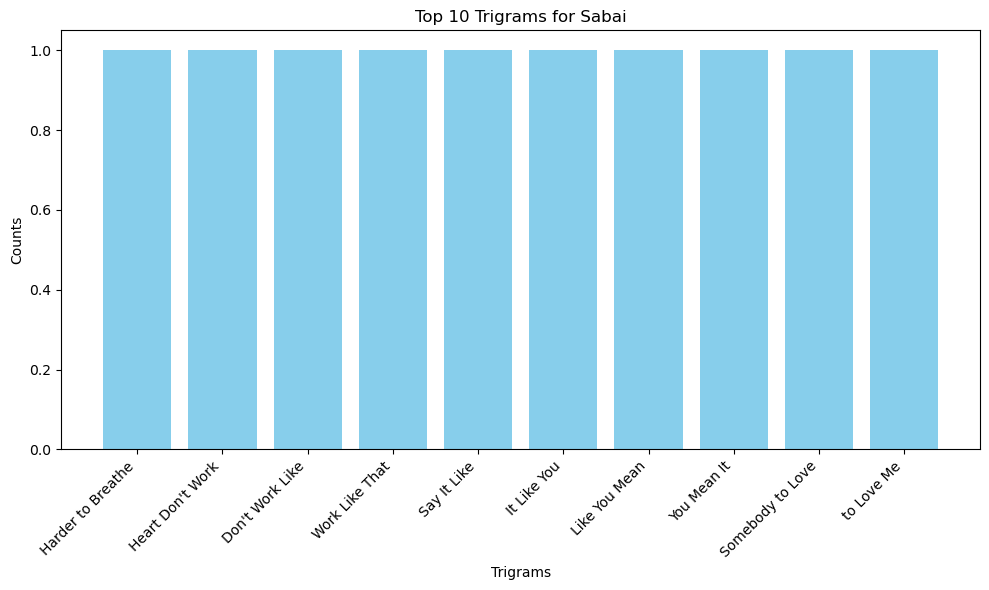

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


df = pd.read_csv('Sabai.csv')

song_titles = []

for title in df['name']:
    song_titles.append(title)

# using list comprehension + enumerate() + split()
# for Trigram formation
res = [(x, i.split()[j + 1], i.split()[j + 2]) for i in song_titles 
       for j, x in enumerate(i.split()) if j < len(i.split()) - 2]

remove = ['-', '&', 'feat.', '(feat.'] # Specifies removals

filtered_list = [item for item in res if not any(unwanted in item for unwanted in remove )]

filtered_list


# Initialize an empty dictionary to count instances
count_dict = {}

# Iterate over the list and count instances
for item in filtered_list:
    if item in count_dict:
        count_dict[item] += 1  # Increment the count
    else:
        count_dict[item] = 1  # Initialize the count
        
count_dict

# Sort the dictionary by value in descending order
sorted_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

# Extract keys as lists and values from the sorted dictionary
sorted_keys = [list(key) for key in sorted_dict.keys()]  # Convert tuple keys to lists
sorted_values = list(sorted_dict.values())

# Visualize only the first 10 entries
top_n = 10  # Number of top entries to visualize
sorted_keys = sorted_keys[:top_n]  # Get the top N keys
sorted_values = sorted_values[:top_n]  # Get the top N values

# Create the bar chart
plt.figure(figsize=(10, 6))  # Optional: make the plot larger
plt.bar([' '.join(key) for key in sorted_keys], sorted_values, color='skyblue')  # Join list elements for display
plt.xlabel('Trigrams')
plt.ylabel('Counts')
plt.title('Top 10 Trigrams for Sabai')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


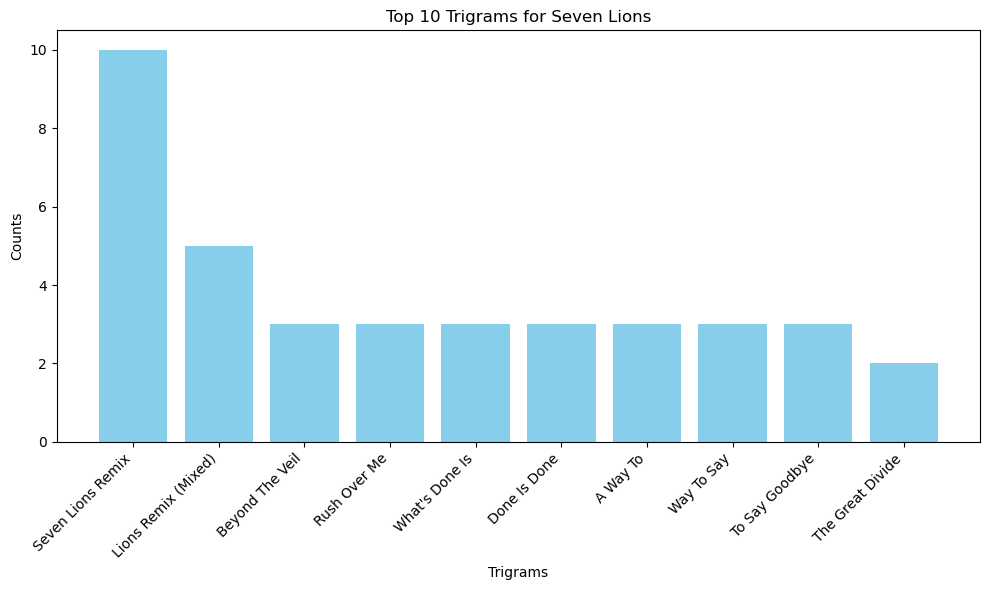

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


df = pd.read_csv('Lions.csv')

song_titles = []

for title in df['name']:
    song_titles.append(title)

# using list comprehension + enumerate() + split()
# for Trigram formation
res = [(x, i.split()[j + 1], i.split()[j + 2]) for i in song_titles 
       for j, x in enumerate(i.split()) if j < len(i.split()) - 2]

remove = ['-', '&', 'feat.', '(feat.'] # Specifies removals

filtered_list = [item for item in res if not any(unwanted in item for unwanted in remove )]

filtered_list


# Initialize an empty dictionary to count instances
count_dict = {}

# Iterate over the list and count instances
for item in filtered_list:
    if item in count_dict:
        count_dict[item] += 1  # Increment the count
    else:
        count_dict[item] = 1  # Initialize the count
        
count_dict

# Sort the dictionary by value in descending order
sorted_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))

# Extract keys as lists and values from the sorted dictionary
sorted_keys = [list(key) for key in sorted_dict.keys()]  # Convert tuple keys to lists
sorted_values = list(sorted_dict.values())

# Visualize only the first 10 entries
top_n = 10  # Number of top entries to visualize
sorted_keys = sorted_keys[:top_n]  # Get the top N keys
sorted_values = sorted_values[:top_n]  # Get the top N values

# Create the bar chart
plt.figure(figsize=(10, 6))  # Optional: make the plot larger
plt.bar([' '.join(key) for key in sorted_keys], sorted_values, color='skyblue')  # Join list elements for display
plt.xlabel('Trigrams')
plt.ylabel('Counts')
plt.title('Top 10 Trigrams for Seven Lions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
